In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("StudentsPerformance.csv")

 1. How are students distributed by gender?

In [5]:
print("=== Gender Distribution ===")
print(df['gender'].value_counts())

print("\nPercentage:")
print(df['gender'].value_counts(normalize=True) * 100)

=== Gender Distribution ===
gender
female    518
male      482
Name: count, dtype: int64

Percentage:
gender
female    51.8
male      48.2
Name: proportion, dtype: float64


2. How many students passed the Math exam?

In [6]:
print("\n=== Math Exam Pass/Fail ===")
passed_math = df[df['math score'] >= 40].shape[0]
failed_math = df[df['math score'] < 40].shape[0]

print("Passed Math:", passed_math)
print("Failed Math:", failed_math)

def classify(score):
    if score >= 80: return 'A'
    elif score >= 70: return 'B'
    elif score >= 60: return 'C'
    elif score >= 50: return 'D'
    elif score >= 40: return 'E'
    else: return 'F'

df['math_grade'] = df['math score'].apply(classify)

# Count per grade:
grade_counts = df['math_grade'].value_counts().sort_index()
grade_percent = (df['math_grade'].value_counts(normalize=True) * 100).sort_index()

print("\n=== Grade Distribution (A–F) ===")
print(grade_counts)

print("\n=== Grade Percentages ===")
print(grade_percent)


=== Math Exam Pass/Fail ===
Passed Math: 960
Failed Math: 40

=== Grade Distribution (A–F) ===
math_grade
A    193
B    216
C    268
D    188
E     95
F     40
Name: count, dtype: int64

=== Grade Percentages ===
math_grade
A    19.3
B    21.6
C    26.8
D    18.8
E     9.5
F     4.0
Name: proportion, dtype: float64


Diagramme math score:

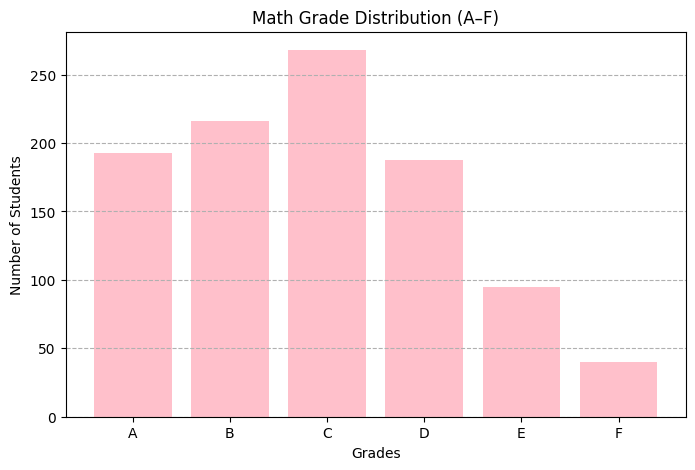

In [7]:
plt.figure(figsize=(8,5))
plt.bar(grade_counts.index, grade_counts.values,color="pink")

plt.title("Math Grade Distribution (A–F)")
plt.xlabel("Grades")
plt.ylabel("Number of Students")

plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

3. Parental edu level for pass/fail Math

In [8]:
print("\n=== Parental Education for Math Pass/Fail ===")
print("\nPass:")
print(df[df['math score'] >= 40]['parental level of education'].value_counts())

print("\nFail:")
print(df[df['math score'] < 40]['parental level of education'].value_counts())


=== Parental Education for Math Pass/Fail ===

Pass:
parental level of education
some college          220
associate's degree    219
high school           182
some high school      166
bachelor's degree     114
master's degree        59
Name: count, dtype: int64

Fail:
parental level of education
high school           14
some high school      13
some college           6
bachelor's degree      4
associate's degree     3
Name: count, dtype: int64


 4.How many students passed the Reading exam?

In [9]:
print("\n=== Math Exam Pass/Fail ===")
passed_reading = df[df['reading score'] >= 40].shape[0]
failed_reading = df[df['reading score'] < 40].shape[0]

print("Passed Reading:", passed_reading)
print("Failed Reading:", failed_reading)


df['reading_grade'] = df['reading score'].apply(classify)

# Count per grade
grade_countss = df['reading_grade'].value_counts().sort_index()
grade_percentt = (df['reading_grade'].value_counts(normalize=True) * 100).sort_index()

print("\n=== Grade Distribution (A–F) ===")
print(grade_countss)

print("\n=== Grade Percentages ===")
print(grade_percentt)


=== Math Exam Pass/Fail ===
Passed Reading: 974
Failed Reading: 26

=== Grade Distribution (A–F) ===
reading_grade
A    249
B    264
C    233
D    164
E     64
F     26
Name: count, dtype: int64

=== Grade Percentages ===
reading_grade
A    24.9
B    26.4
C    23.3
D    16.4
E     6.4
F     2.6
Name: proportion, dtype: float64


Diagramme reading score:

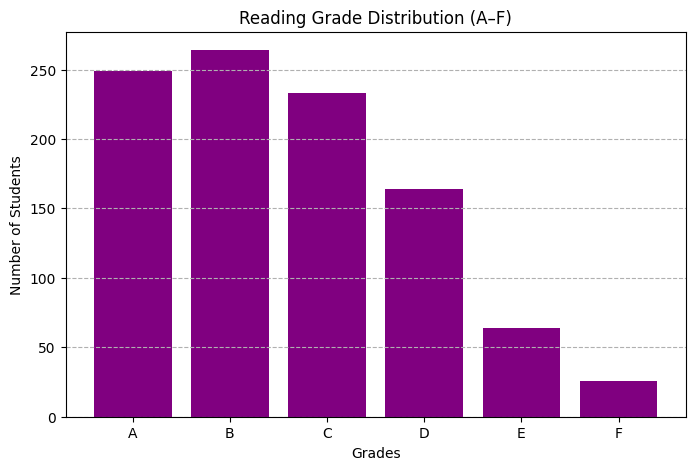

In [10]:
plt.figure(figsize=(8,5))
plt.bar(grade_countss.index, grade_countss.values,color="purple")

plt.title("Reading Grade Distribution (A–F)")
plt.xlabel("Grades")
plt.ylabel("Number of Students")

plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

5.What is the parental level of education for students who passed and failed the Reading exam?

In [11]:
print("\n=== Parental Education for Reading Pass/Fail ===")
print("\nPass:")
print(df[df['reading score'] >= 40]['parental level of education'].value_counts())

print("\nFail:")
print(df[df['reading score'] < 40]['parental level of education'].value_counts())



=== Parental Education for Reading Pass/Fail ===

Pass:
parental level of education
associate's degree    220
some college          219
high school           189
some high school      169
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Fail:
parental level of education
some high school      10
high school            7
some college           7
associate's degree     2
Name: count, dtype: int64


6.How many students passed all subjects, and what is their parental level of education?

In [12]:
print("\n=== Students Who Passed ALL Subjects (>=40) ===")
passed_all = df[(df['math score'] >= 40) &
                (df['reading score'] >= 40) &
                (df['writing score'] >= 40)]

print("Total passed all subjects:", passed_all.shape[0])

print("\nParental level of education for passed-all:")
print(passed_all['parental level of education'].value_counts())

print("\n=== Students Who Failed ALL Subjects (<40) ===")
failed_all = df[(df['math score'] < 40) &
                (df['reading score'] < 40) &
                (df['writing score'] < 40)]

print("Total failed all subjects:", failed_all.shape[0])
print("\nParental level of education for failed-all:")
print(failed_all['parental level of education'].value_counts())


=== Students Who Passed ALL Subjects (>=40) ===
Total passed all subjects: 949

Parental level of education for passed-all:
parental level of education
associate's degree    217
some college          216
high school           180
some high school      163
bachelor's degree     114
master's degree        59
Name: count, dtype: int64

=== Students Who Failed ALL Subjects (<40) ===
Total failed all subjects: 18

Parental level of education for failed-all:
parental level of education
some high school      7
high school           5
some college          5
associate's degree    1
Name: count, dtype: int64


7. Using the following grade distribution, how are grades distributed among students?

In [13]:
#Calcul de la moyenne de chaque etudiant dans les 3 matière
print("\n la Moyenne de chaque etudiant dans les 3 matière:")
df["Moyenne_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df['Moyenne_grade'] = df['Moyenne_score'].apply(classify)
print(df[["math score", "reading score", "writing score", "Moyenne_score","Moyenne_grade"]])


 la Moyenne de chaque etudiant dans les 3 matière:
     math score  reading score  writing score  Moyenne_score Moyenne_grade
0            72             72             74      72.666667             B
1            69             90             88      82.333333             A
2            90             95             93      92.666667             A
3            47             57             44      49.333333             E
4            76             78             75      76.333333             B
..          ...            ...            ...            ...           ...
995          88             99             95      94.000000             A
996          62             55             55      57.333333             D
997          59             71             65      65.000000             C
998          68             78             77      74.333333             B
999          77             86             86      83.000000             A

[1000 rows x 5 columns]


8. Parental education level for each grade based on all subjects

In [14]:
print("\n=== Parental Education for Each Grade ===")
grades = ['A','B','C','D','E','F']

for grade in grades:
    print(f"\nGrade {grade} :")
    print(df[df['Moyenne_grade'] == grade]['parental level of education'].value_counts())

# Créer un DataFrame pour le barplot
count_data = df.groupby(['parental level of education', 'Moyenne_grade']).size().reset_index(name='count')



=== Parental Education for Each Grade ===

Grade A :
parental level of education
associate's degree    51
some college          46
bachelor's degree     31
some high school      30
master's degree       20
high school           20
Name: count, dtype: int64

Grade B :
parental level of education
some college          62
associate's degree    59
high school           45
some high school      44
bachelor's degree     35
master's degree       16
Name: count, dtype: int64

Grade C :
parental level of education
some college          63
high school           55
associate's degree    53
some high school      41
bachelor's degree     31
master's degree       13
Name: count, dtype: int64

Grade D :
parental level of education
high school           43
associate's degree    42
some college          40
some high school      35
bachelor's degree     13
master's degree        9
Name: count, dtype: int64

Grade E :
parental level of education
high school           23
some high school      19
associat

Plot avec Seaborn:

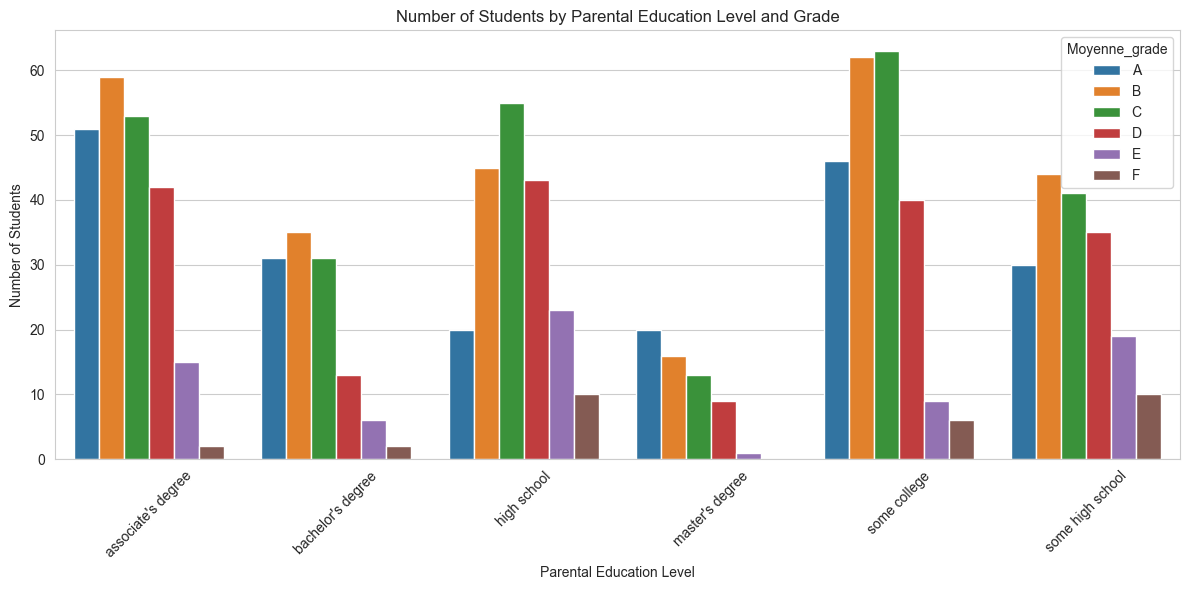

In [21]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=count_data,x="parental level of education",y="count",hue="Moyenne_grade")

plt.xlabel("Parental Education Level")
plt.ylabel("Number of Students")
plt.title("Number of Students by Parental Education Level and Grade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


9. What is the correlation between the scores in different subjects?

In [17]:
print("\n=== Correlation Matrix ===")
corr = df[['math score', 'reading score', 'writing score']].corr()
print(corr)


=== Correlation Matrix ===
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


10. Did students who completed their test preparation score better than those who didn't?

In [18]:
print("\n=== Test Preparation Course Impact ===")

prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(prep)

print("\nConclusion:")
print("Students who completed the test preparation scored higher on average.")


=== Test Preparation Course Impact ===
                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673

Conclusion:
Students who completed the test preparation scored higher on average.


xx:

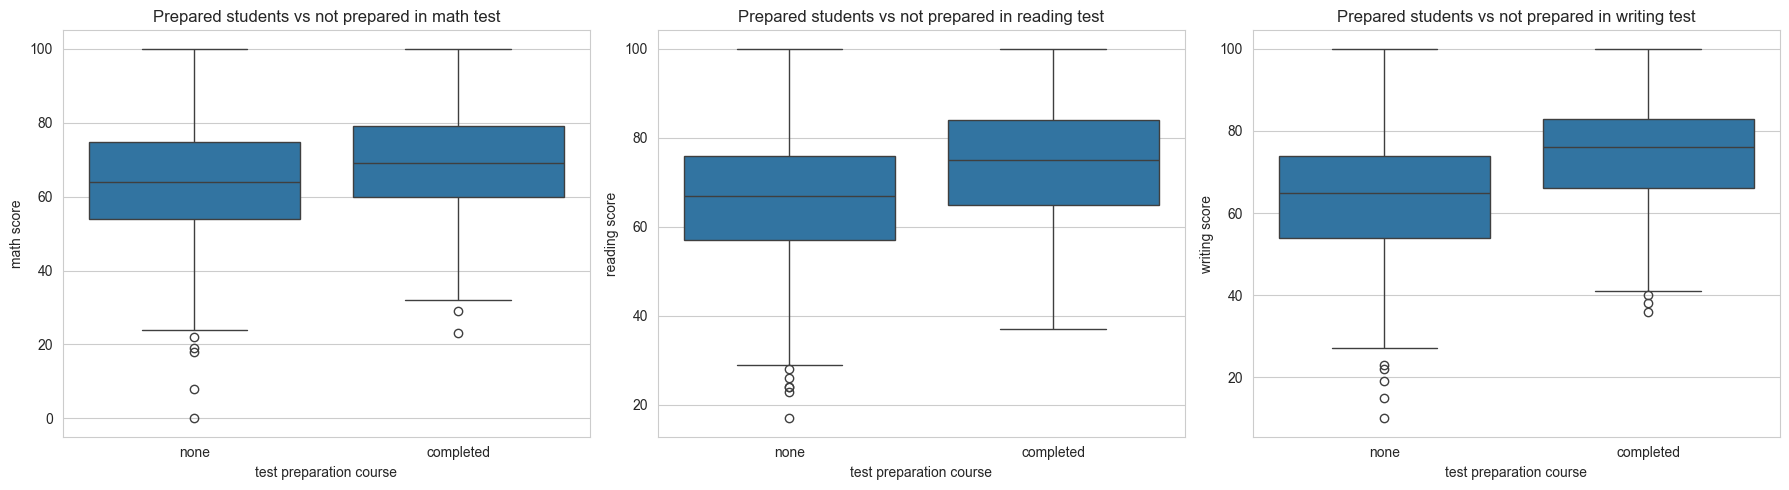

In [19]:
plt.figure(figsize=(18,5))

# ----------- MATH -----------
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="test preparation course", y="math score")
plt.title("Prepared students vs not prepared in math test")
plt.xlabel("test preparation course")
plt.ylabel("math score")

# ----------- READING -----------
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="test preparation course", y="reading score",)
plt.title("Prepared students vs not prepared in reading test")
plt.xlabel("test preparation course")
plt.ylabel("reading score")

# ----------- WRITING -----------
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="test preparation course", y="writing score")
plt.title("Prepared students vs not prepared in writing test")
plt.xlabel("test preparation course")
plt.ylabel("writing score")

plt.tight_layout()
plt.show()

tranforming code info to csv:

In [20]:
df.to_csv("StudentsPerformance_PBI.csv", index=False)